# Initial Data Exploration

Load all the raw data

In [14]:
import os
import pandas as pd

def load_all_data():
    home = os.path.expanduser("~")
    base_dir = os.path.join(
        home,
        "Documents",
        "data analytics",
        "Data-Analytics-and-Learning-Methods",
        "data",
        "raw",
    )

    activities = ["running", "sit_down", "stairs", "stand_up", "walking"]

    data = {}

    for activity in activities:
        activity_dir = os.path.join(base_dir, activity)

        subfolders = [
            os.path.join(activity_dir, d)
            for d in os.listdir(activity_dir)
            if os.path.isdir(os.path.join(activity_dir, d))
        ]

        data[activity] = {}

        for folder in subfolders:
            folder_name = os.path.basename(folder)
            csvs = {}
            for file_name in os.listdir(folder):
                if file_name.endswith(".csv"):
                    file_path = os.path.join(folder, file_name)
                    print(f"Loading {file_path}...")
                    try:
                        df = pd.read_csv(file_path, skipinitialspace=True)
                        if df.empty:
                            continue
                        df.columns = df.columns.str.strip()
                        csvs[file_name] = df
                    except Exception as e:
                        print(f"Could not load {file_name}: {e}")
            if csvs:
                data[activity][folder_name] = csvs

    return data

# Load all data into memory
all_data = load_all_data()
print("Data loaded. Available activities:", list(all_data.keys()))


Loading C:\Users\ozdep\Documents\data analytics\Data-Analytics-and-Learning-Methods\data\raw\running\Berkan_Run_1-2025-09-14_14-12-58\Accelerometer.csv...
Loading C:\Users\ozdep\Documents\data analytics\Data-Analytics-and-Learning-Methods\data\raw\running\Berkan_Run_1-2025-09-14_14-12-58\AccelerometerUncalibrated.csv...
Loading C:\Users\ozdep\Documents\data analytics\Data-Analytics-and-Learning-Methods\data\raw\running\Berkan_Run_1-2025-09-14_14-12-58\Annotation.csv...
Could not load Annotation.csv: No columns to parse from file
Loading C:\Users\ozdep\Documents\data analytics\Data-Analytics-and-Learning-Methods\data\raw\running\Berkan_Run_1-2025-09-14_14-12-58\Gravity.csv...
Loading C:\Users\ozdep\Documents\data analytics\Data-Analytics-and-Learning-Methods\data\raw\running\Berkan_Run_1-2025-09-14_14-12-58\Gyroscope.csv...
Loading C:\Users\ozdep\Documents\data analytics\Data-Analytics-and-Learning-Methods\data\raw\running\Berkan_Run_1-2025-09-14_14-12-58\GyroscopeUncalibrated.csv...
Lo

To analyze the data plot the .csv files of one random raw data from each class, to see where the data needs to be cleaned up

Activity: walking | Folder: Berkan_Walk_1-2025-09-14_14-10-12


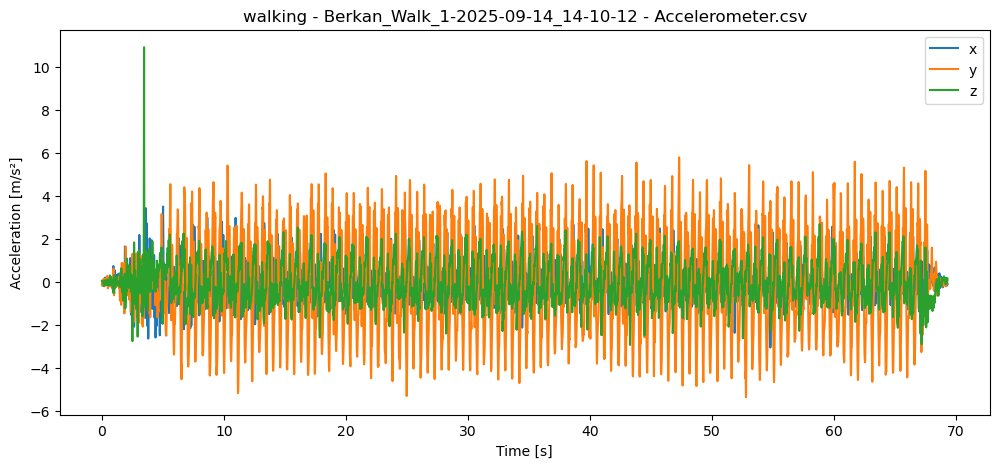

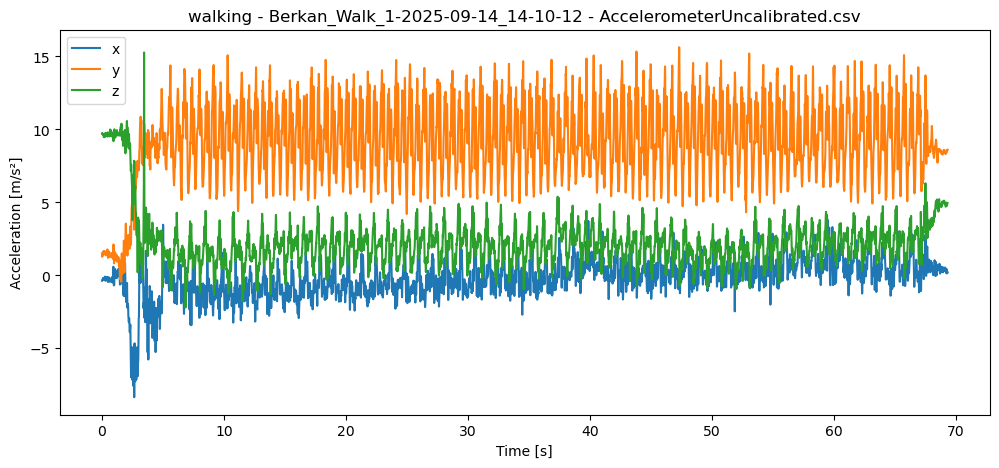

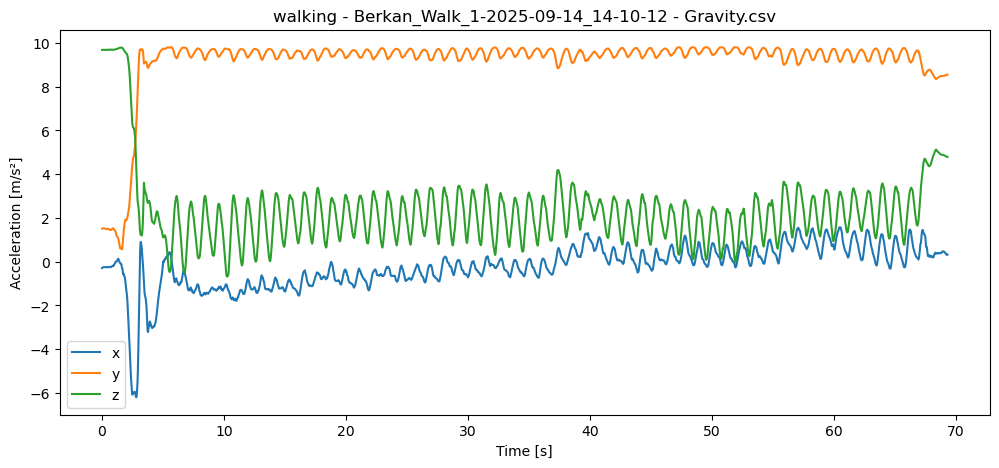

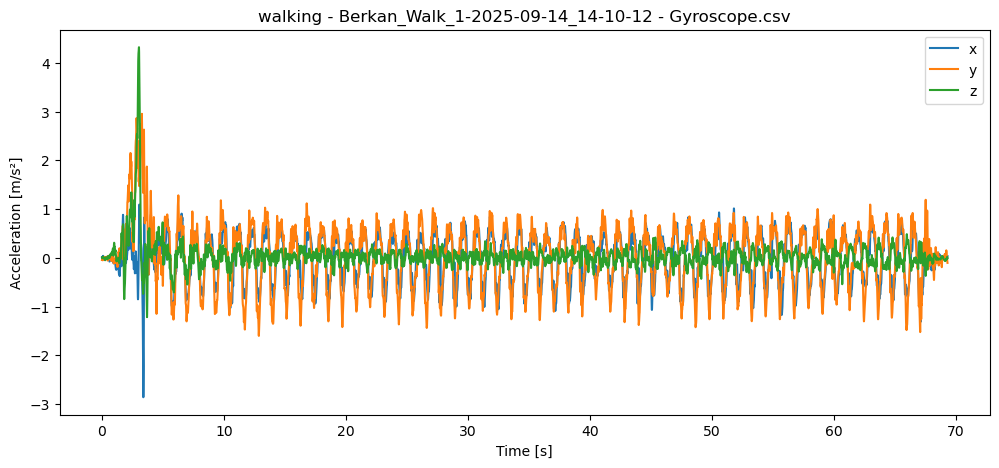

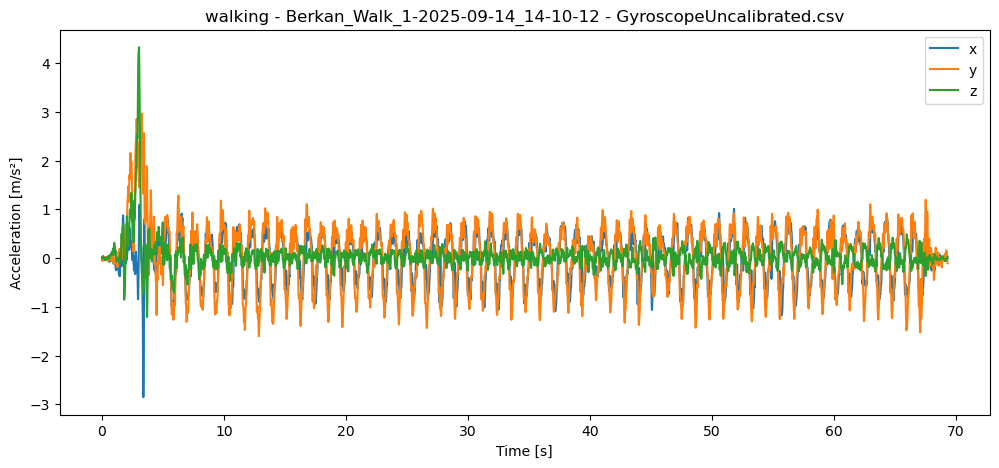

In [64]:
import matplotlib.pyplot as plt
import random

# Pick one folder from running and plot Accelerometer.csv
for activity, folders in all_data.items():
    if not folders:
        continue

    # change the name of the activity to investigate other activities' plots
    if activity == "walking":

        # uncomment to choose a random folder
        #chosen_folder = random.choice(list(folders.keys()))

        # chose the first folder for reproducibility
        chosen_folder = list(folders.keys())[0]
        print(f"Activity: {activity} | Folder: {chosen_folder}")

        df = folders[chosen_folder]["Accelerometer.csv"]

        # Plot accelerometer signals
        time = df["seconds_elapsed"].values
        plt.figure(figsize=(12,5))
        plt.plot(time, df["x"], label="x")
        plt.plot(time, df["y"], label="y")
        plt.plot(time, df["z"], label="z")

        plt.title(f"{activity} - {chosen_folder} - Accelerometer.csv")
        plt.xlabel("Time [s]")
        plt.ylabel("Acceleration [m/s²]")
        plt.legend()
        plt.show()

        # plot accelerometerUncalibrated.csv
        df = folders[chosen_folder]["AccelerometerUncalibrated.csv"]
        time = df["seconds_elapsed"].values
        plt.figure(figsize=(12,5))
        plt.plot(time, df["x"], label="x")
        plt.plot(time, df["y"], label="y")
        plt.plot(time, df["z"], label="z")

        plt.title(f"{activity} - {chosen_folder} - AccelerometerUncalibrated.csv")
        plt.xlabel("Time [s]")
        plt.ylabel("Acceleration [m/s²]")
        plt.legend()
        plt.show()

        # plot gravity.csv
        df = folders[chosen_folder]["Gravity.csv"]
        time = df["seconds_elapsed"].values
        plt.figure(figsize=(12,5))
        plt.plot(time, df["x"], label="x")
        plt.plot(time, df["y"], label="y")
        plt.plot(time, df["z"], label="z")

        plt.title(f"{activity} - {chosen_folder} - Gravity.csv")
        plt.xlabel("Time [s]")
        plt.ylabel("Acceleration [m/s²]")
        plt.legend()
        plt.show()

        # plot gyroscope.csv
        df = folders[chosen_folder]["Gyroscope.csv"]
        time = df["seconds_elapsed"].values
        plt.figure(figsize=(12,5))
        plt.plot(time, df["x"], label="x")
        plt.plot(time, df["y"], label="y")
        plt.plot(time, df["z"], label="z")

        plt.title(f"{activity} - {chosen_folder} - Gyroscope.csv")
        plt.xlabel("Time [s]")
        plt.ylabel("Acceleration [m/s²]")
        plt.legend()
        plt.show()

        # plot gyroscopeUncalibrated.csv
        df = folders[chosen_folder]["GyroscopeUncalibrated.csv"]
        time = df["seconds_elapsed"].values
        plt.figure(figsize=(12,5))
        plt.plot(time, df["x"], label="x")
        plt.plot(time, df["y"], label="y")
        plt.plot(time, df["z"], label="z")

        plt.title(f"{activity} - {chosen_folder} - GyroscopeUncalibrated.csv")
        plt.xlabel("Time [s]")
        plt.ylabel("Acceleration [m/s²]")
        plt.legend()
        plt.show()

        break


The next step is to clean the data. Since the data was recorded by placing our phones on an arm band, the part where we were placing the phone in the arm band needs to be removed as it is not recording any of the class activities. By looking at the plots we can see that this part is clearly visible through:

- Constant unfluctuating values for Accelerometer.csv/AccelerometerUncalibrated.csv/Gyroscope.csv file for the running class (for this file Accelerometer.csv was used)
- Constant unfluctuating values for Accelerometer.csv/AccelerometerUncalibrated.csv/Gyroscope.csv file for the walking class (for this file Gyroscope.csv was used)
- Value of 0 for Accelerometer.csv for sitting down
- Values that are in a constant fluctuation for Accelerometer.csv for stairs
- No change needed for standing up?? --> Not sure

Activity: running | Folder: Berkan_Run_1-2025-09-14_14-12-58


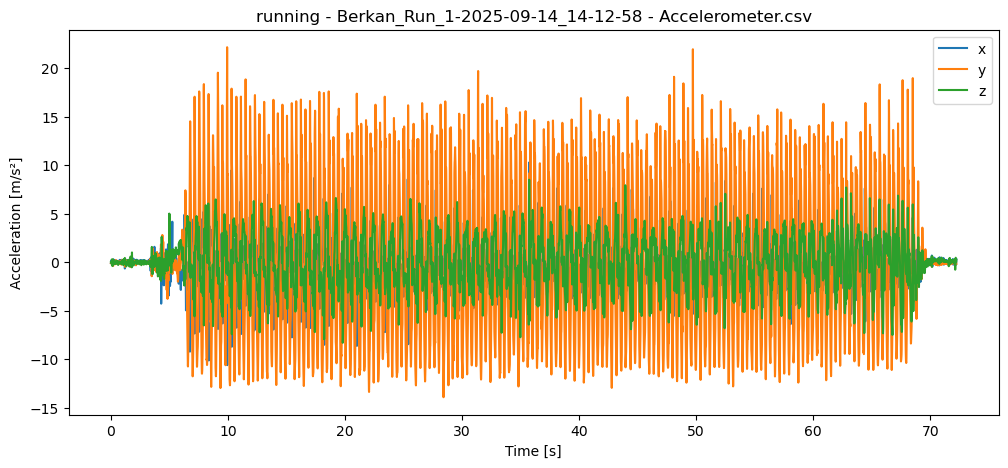

In [ ]:
import matplotlib.pyplot as plt
import random

# Pick one folder from running and plot Accelerometer.csv
for activity, folders in all_data.items():
    if not folders:
        continue
    if activity == "running":

        #chosen_folder = random.choice(list(folders.keys()))

        # chose the first folder for reproducibility
        chosen_folder = list(folders.keys())[0]
        print(f"Activity: {activity} | Folder: {chosen_folder}")

        df = folders[chosen_folder]["Accelerometer.csv"]

        # Plot accelerometer signals
        time = df["seconds_elapsed"].values
        plt.figure(figsize=(12,5))
        plt.plot(time, df["x"], label="x")
        plt.plot(time, df["y"], label="y")
        plt.plot(time, df["z"], label="z")

        plt.title(f"{activity} - {chosen_folder} - Accelerometer.csv")
        plt.xlabel("Time [s]")
        plt.ylabel("Acceleration [m/s²]")
        plt.legend()
        plt.show()
        break


In order to trim the data automatically and correctly, for the running class the following algorithm was deployed:

- Access the min and max values of the y value in the Accelerometer.csv file

- Outline a 5 seconds time frame

- For every time frame check whether the min/max values are greater than twice the amount of the current time frame's min/max values 

- If it is then mark the exact time frame on the original graph

Activity: running | Folder: Berkan_Run_1-2025-09-14_14-12-58


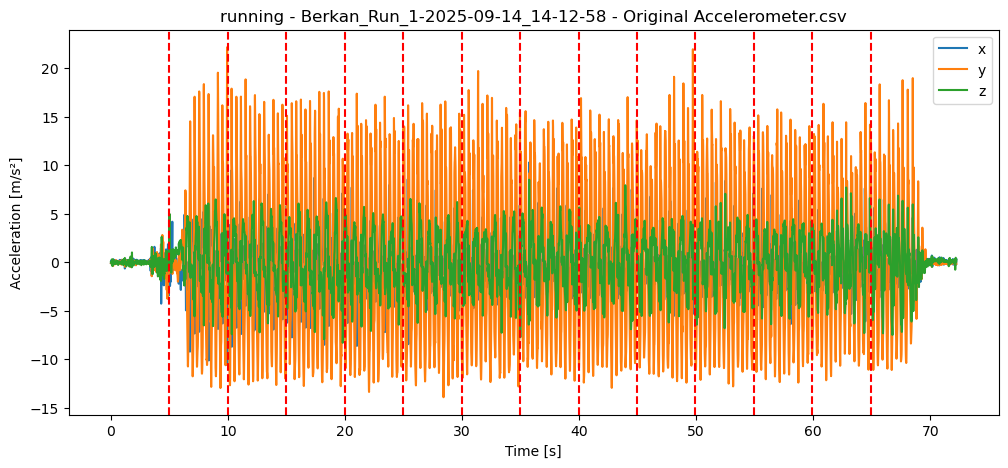

In [44]:
import matplotlib.pyplot as plt
import random
import numpy as np

def get_y_axis_limits(df):
    return df["y"].min(), df["y"].max()


# Access the Accelerometer.csv data of the running activity
for activity, folders in all_data.items():
    if not folders:
        continue
    if activity == "running":
        #chosen_folder = random.choice(list(folders.keys()))

        chosen_folder = list(folders.keys())[0]
        print(f"Activity: {activity} | Folder: {chosen_folder}")

        df = folders[chosen_folder]["Accelerometer.csv"]

        time = df["seconds_elapsed"].values
        y_values = df["y"].values

        # Parameters
        window_size = 5  # seconds
        sample_rate = len(time) / (time[-1] - time[0])  # approx samples per second
        step = int(window_size * sample_rate)

        cutoff_times = []
        prev_y_min, prev_y_max = None, None

        # Slide through the signal in windows
        for start in range(0, len(y_values), step):
            end = min(start + step, len(y_values))
            window_y = y_values[start:end]

            if len(window_y) == 0:
                continue

            curr_y_min, curr_y_max = window_y.min(), window_y.max()

            if prev_y_min is not None and prev_y_max is not None:
                # Check sudden jump relative to previous window
                if (curr_y_max > 2 * prev_y_max) or (curr_y_min < 0.5 * prev_y_min):
                    cutoff_times.append(time[start])  # mark cutoff at window start

            prev_y_min, prev_y_max = curr_y_min, curr_y_max

        
        plt.figure(figsize=(12,5))
        plt.plot(time, df["x"], label="x")
        plt.plot(time, df["y"], label="y")
        plt.plot(time, df["z"], label="z")

        # Mark cutoff points
        for ct in cutoff_times:
            plt.axvline(ct, color="red", linestyle="--")

        plt.title(f"{activity} - {chosen_folder} - Original Accelerometer.csv")
        plt.xlabel("Time [s]")
        plt.ylabel("Acceleration [m/s²]")
        plt.legend()
        plt.show()
        break


# Data Augmentation

To increase the size of the dataset we will be making the windows (time frames) overlap by 50% so half of the samples in a window are also part of the next window. 

Activity: running | Folder: Berkan_Run_1-2025-09-14_14-12-58

Overlapping windows (5s, 50% overlap, after trim):
Window 1: 5.00s → 9.99s
Window 2: 7.50s → 12.48s
Window 3: 10.00s → 14.98s
Window 4: 12.49s → 17.47s
Window 5: 14.99s → 19.97s
Window 6: 17.48s → 22.47s
Window 7: 19.98s → 24.96s
Window 8: 22.48s → 27.46s
Window 9: 24.97s → 29.95s
Window 10: 27.47s → 32.45s
Window 11: 29.96s → 34.94s
Window 12: 32.46s → 37.44s
Window 13: 34.95s → 39.94s
Window 14: 37.45s → 42.43s
Window 15: 39.95s → 44.93s
Window 16: 42.44s → 47.42s
Window 17: 44.94s → 49.92s
Window 18: 47.43s → 52.42s
Window 19: 49.93s → 54.91s
Window 20: 52.43s → 57.41s
Window 21: 54.92s → 59.90s
Window 22: 57.42s → 62.40s
Window 23: 59.91s → 64.89s
Window 24: 62.41s → 67.39s
Window 25: 64.90s → 69.89s


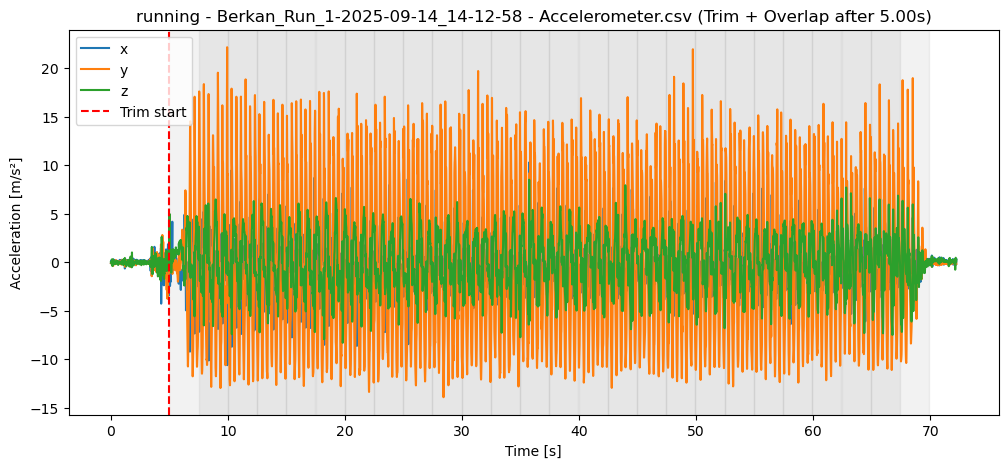


Detected trim start: 5.00s
Total overlapping windows created: 25


In [ ]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Access the Accelerometer.csv data of the running activity
for activity, folders in all_data.items():
    if not folders:
        continue
    if activity == "running":
        chosen_folder = list(folders.keys())[0]  # pick first folder
        print(f"Activity: {activity} | Folder: {chosen_folder}")

        df = folders[chosen_folder]["Accelerometer.csv"]

        time = df["seconds_elapsed"].values
        y_values = df["y"].values

        # Parameters
        window_size = 5  # seconds
        sample_rate = len(time) / (time[-1] - time[0])  # approx samples per second
        step = int(window_size * sample_rate)
        stride = step // 2   # 50% overlap

        cutoff_times = []
        prev_y_min, prev_y_max = None, None
        consecutive_hits = 0
        required_hits = 2  # need 2 consecutive windows to confirm change

        # Detect trim points 
        for start in range(0, len(y_values) - step + 1, stride):
            end = start + step
            window_y = y_values[start:end]

            if len(window_y) == 0:
                continue

            curr_y_min, curr_y_max = window_y.min(), window_y.max()

            # We require the condition to hold for 2 consecutive windows (required_hits = 2)
            # This filters out small random spikes at the start.
            if prev_y_min is not None and prev_y_max is not None:
                if (curr_y_max > 2 * prev_y_max) or (curr_y_min < 0.5 * prev_y_min):
                    consecutive_hits += 1
                    if consecutive_hits >= required_hits:
                        cutoff_times.append(time[start])
                        break   # stop at the first trim start
                else:
                    consecutive_hits = 0

            prev_y_min, prev_y_max = curr_y_min, curr_y_max

        # First trim time
        if cutoff_times:
            trim_start = cutoff_times[0]
        else:
            trim_start = time[0]

        # Slice into overlapping windows starting from trim_start 
        overlapping_windows = []
        print("\nOverlapping windows (5s, 50% overlap, after trim):")
        start_idx = np.searchsorted(time, trim_start)  # index of trim_start
        for i, start in enumerate(range(start_idx, len(y_values) - step + 1, stride)):
            end = start + step
            window_df = df.iloc[start:end]
            overlapping_windows.append(window_df)

            start_time, end_time = time[start], time[end-1]
            print(f"Window {i+1}: {start_time:.2f}s → {end_time:.2f}s")

        plt.figure(figsize=(12,5))
        plt.plot(time, df["x"], label="x")
        plt.plot(time, df["y"], label="y")
        plt.plot(time, df["z"], label="z")

        # Mark cutoff line
        plt.axvline(trim_start, color="red", linestyle="--", label="Trim start")

        # Shade overlapping windows
        for i, window_df in enumerate(overlapping_windows):
            win_start, win_end = window_df["seconds_elapsed"].iloc[0], window_df["seconds_elapsed"].iloc[-1]
            plt.axvspan(win_start, win_end, color="gray", alpha=0.1)

        plt.title(f"{activity} - {chosen_folder} - Accelerometer.csv (Trim + Overlap after {trim_start:.2f}s)")
        plt.xlabel("Time [s]")
        plt.ylabel("Acceleration [m/s²]")
        plt.legend()
        plt.show()

        print(f"\nDetected trim start: {trim_start:.2f}s")
        print(f"Total overlapping windows created: {len(overlapping_windows)}")
        break


Use the returned time frames to split the raw data, so every .csv, into smaller sections based on the returned timeframes in the previous step.
Plot the split to investigate it.

Activity: running | Folder: Berkan_Run_1-2025-09-14_14-12-58

Overlapping windows (5s, 50% overlap, after trim):
Window 1: 5.00s → 9.99s
Window 2: 7.50s → 12.48s
Window 3: 10.00s → 14.98s
Window 4: 12.49s → 17.47s
Window 5: 14.99s → 19.97s
Window 6: 17.48s → 22.47s
Window 7: 19.98s → 24.96s
Window 8: 22.48s → 27.46s
Window 9: 24.97s → 29.95s
Window 10: 27.47s → 32.45s
Window 11: 29.96s → 34.94s
Window 12: 32.46s → 37.44s
Window 13: 34.95s → 39.94s
Window 14: 37.45s → 42.43s
Window 15: 39.95s → 44.93s
Window 16: 42.44s → 47.42s
Window 17: 44.94s → 49.92s
Window 18: 47.43s → 52.42s
Window 19: 49.93s → 54.91s
Window 20: 52.43s → 57.41s
Window 21: 54.92s → 59.90s
Window 22: 57.42s → 62.40s
Window 23: 59.91s → 64.89s
Window 24: 62.41s → 67.39s
Window 25: 64.90s → 69.89s

Files available in window 1:
Accelerometer.csv: shape (500, 5)


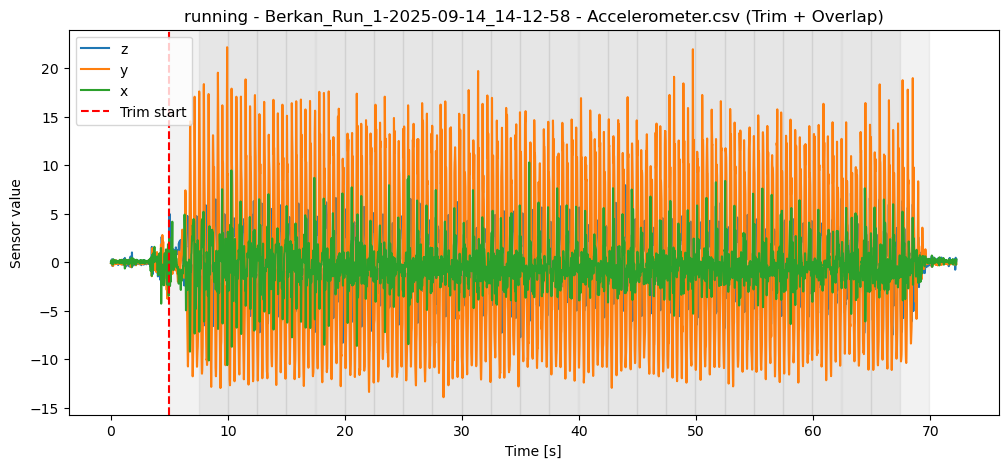

AccelerometerUncalibrated.csv: shape (499, 5)


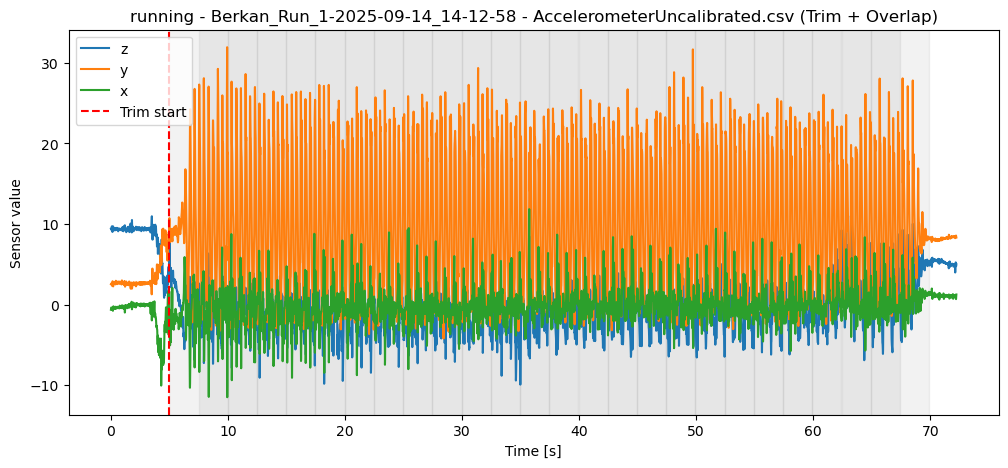

Gravity.csv: shape (500, 5)


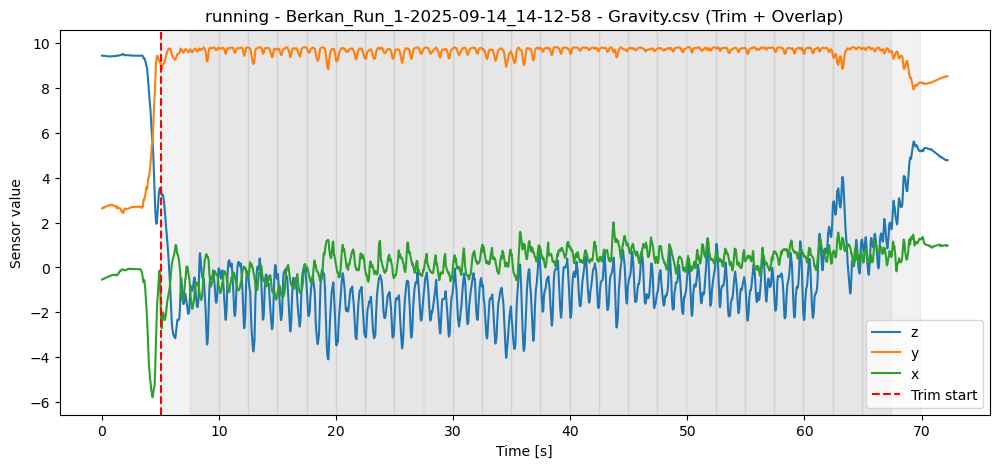

Gyroscope.csv: shape (500, 5)


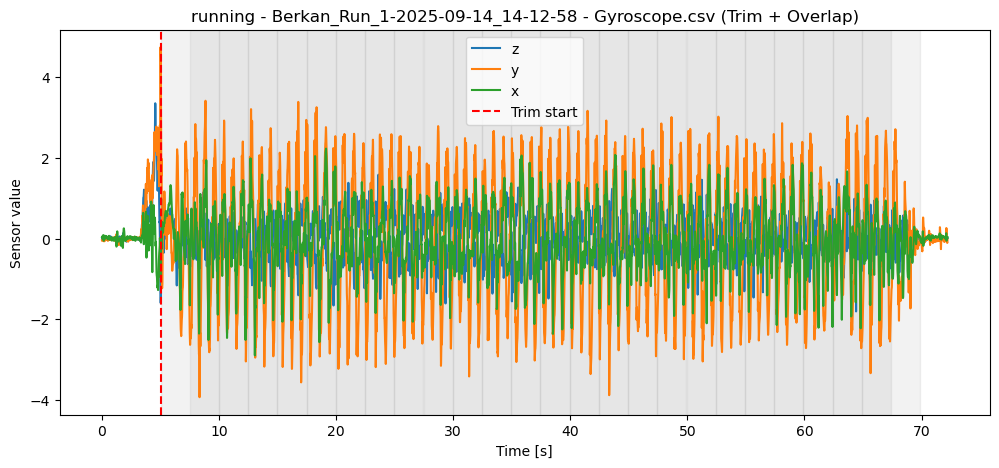

GyroscopeUncalibrated.csv: shape (500, 5)


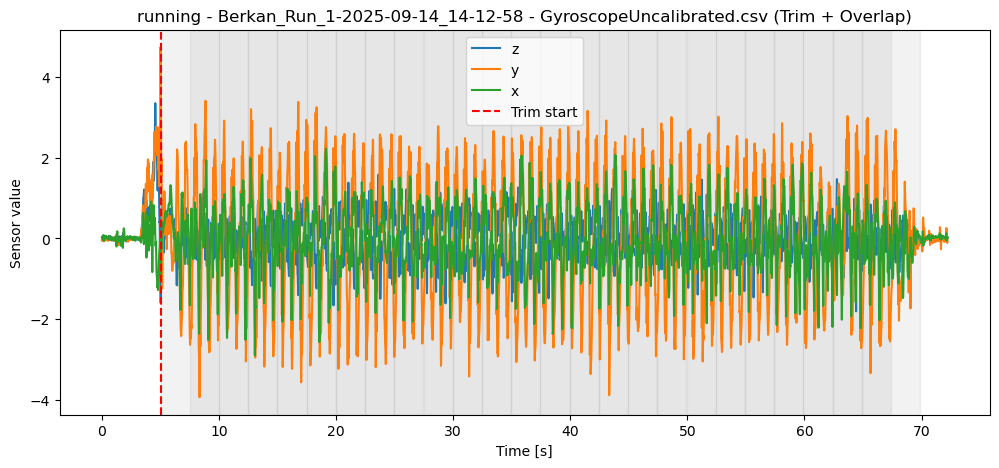

In [68]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Access the Accelerometer.csv data of the running activity
for activity, folders in all_data.items():
    if not folders:
        continue
    if activity == "running":
        chosen_folder = list(folders.keys())[0]  # pick first folder
        print(f"Activity: {activity} | Folder: {chosen_folder}")

        folder_data = folders[chosen_folder]  # dict of {filename: DataFrame}
        df = folder_data["Accelerometer.csv"]

        time = df["seconds_elapsed"].values
        y_values = df["y"].values

        # Parameters
        window_size = 5  # seconds
        sample_rate = len(time) / (time[-1] - time[0])  # approx samples per second
        step = int(window_size * sample_rate)
        stride = step // 2   # 50% overlap

        cutoff_times = []
        prev_y_min, prev_y_max = None, None
        consecutive_hits = 0
        required_hits = 2  # need 2 consecutive windows to confirm change

        # Detect trim points from Accelerometer 
        for start in range(0, len(y_values) - step + 1, stride):
            end = start + step
            window_y = y_values[start:end]

            if len(window_y) == 0:
                continue

            curr_y_min, curr_y_max = window_y.min(), window_y.max()

            if prev_y_min is not None and prev_y_max is not None:
                if (curr_y_max > 2 * prev_y_max) or (curr_y_min < 0.5 * prev_y_min):
                    consecutive_hits += 1
                    if consecutive_hits >= required_hits:
                        cutoff_times.append(time[start])
                        break   # stop at the first trim start
                else:
                    consecutive_hits = 0

            prev_y_min, prev_y_max = curr_y_min, curr_y_max

        # First trim time
        if cutoff_times:
            trim_start = cutoff_times[0]
        else:
            trim_start = time[0]

        # Slice into overlapping windows starting from trim_start 
        windows = []
        print("\nOverlapping windows (5s, 50% overlap, after trim):")
        start_idx = np.searchsorted(time, trim_start)  # index of trim_start
        for i, start in enumerate(range(start_idx, len(y_values) - step + 1, stride)):
            end = start + step
            win_start, win_end = time[start], time[end-1]
            windows.append((win_start, win_end))
            print(f"Window {i+1}: {win_start:.2f}s → {win_end:.2f}s")

        # Apply the windows to ALL CSVs in the folder 
        windowed_data = {}
        for i, (win_start, win_end) in enumerate(windows):
            windowed_data[i] = {}
            for file_name, file_df in folder_data.items():
                if "seconds_elapsed" not in file_df.columns:
                # skip metadata/annotation files without time
                    continue

                mask = (file_df["seconds_elapsed"] >= win_start) & (file_df["seconds_elapsed"] <= win_end)
                windowed_data[i][file_name] = file_df[mask].copy()


        
        # Inspect one window’s files
        print("\nFiles available in window 1:")
        for fname, file_df in windowed_data[0].items():
            print(f"{fname}: shape {file_df.shape}")

            if "seconds_elapsed" not in file_df.columns:
                continue  # skip files without time column

            # plot this file
            plot_file = fname
            plot_df = folder_data[plot_file]

            plt.figure(figsize=(12,5))
            time = plot_df["seconds_elapsed"].values

            # plot all numeric columns except time
            for col in plot_df.columns:
                if col != "seconds_elapsed" and col != "time":
                    plt.plot(time, plot_df[col], label=col)

            # mark trim start
            plt.axvline(trim_start, color="red", linestyle="--", label="Trim start")

            # shade overlapping windows
            for win_start, win_end in windows:
                plt.axvspan(win_start, win_end, color="gray", alpha=0.1)

            plt.title(f"{activity} - {chosen_folder} - {plot_file} (Trim + Overlap)")
            plt.xlabel("Time [s]")
            plt.ylabel("Sensor value")
            plt.legend()
            plt.show()
